In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
# train_test_split function to split train and test part of an array
from sklearn.model_selection import train_test_split
pd.option_context('mode.use_inf_as_na', True)

In [2]:
def describeAll(dataFrame):
    return dataFrame.describe(include='all')

In [3]:
cars_data = pd.read_csv("1.04.+Real-life+example.csv") 

# include= 'all' means also include categorical data, By Default only shows the numerical data.
describeAll(cars_data)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
# Just because 'Model' feature has '312' unique values so it means we have to make 312 dummies for each value
# So for now we are dropping or skipping the 'Model' feature.
cars_data = cars_data.drop(['Model'],axis= 1)
describeAll(cars_data)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [5]:
# To check how much null values in dataFrame panda has method > DataFrame.isnull()

cars_data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [6]:
# if any feature's null values count is more than 5% we can simply remove that features.
cars_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
### (1.0) For now null values are less than 5% so we can skip them but we can remove the rows (if any feature's value is null in any row)

In [8]:
# So we will use ad-hoc solutions/method(termnology) 
# "Ad-hoc" describes solutions designed for a specific task or problem, not for broad, general use.
# :: Reference 1.0 markdown ::
# cars_data_no_mv > no mv means "No Missing Value"
cars_data_no_mv = cars_data.dropna(axis=0) 
describeAll(cars_data_no_mv)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Lets explore Probability distribution function for each function.

In [10]:
def showHistPlot(data):
    sns.histplot(data, kde=True, stat="density" , kde_kws=dict(cut=3),  edgecolor=(1, 1, 1, .4)) 

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


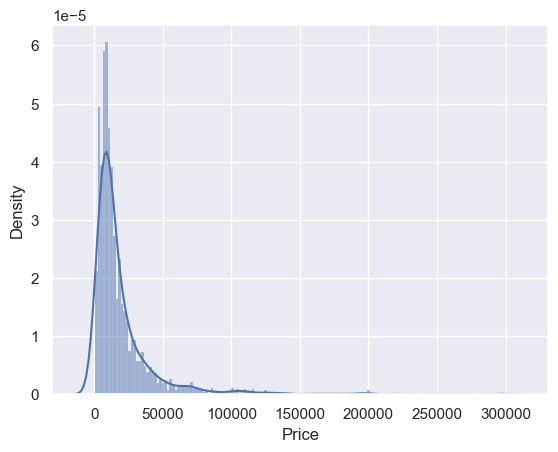

In [11]:
showHistPlot(cars_data_no_mv['Price'])

### We are looking for normal distribution > The bell curve in middle
### But the given plot is not normal distribution 

In [13]:
# In predictive modeling or machine learning, outliers can adversely impact model training,
# leading to poor generalization, overfitting, or skewed predictions.

# The 99% of maximum value > OUTPUT > 129812.51999999981
q = cars_data_no_mv['Price'].quantile(0.99)

# Only covering values below (99%)129812.51999999981
# This will also remove rows which are above (99%)129812.51999999981
# Creating new "data1" from "cars_data_no_mv" dataframe
data1 = cars_data_no_mv[cars_data_no_mv['Price']<q]
describeAll(data1)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


### You can see now count of each feature has been decreased than before. 
#### Because we removed row where price values is more than 129812.51999999981

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


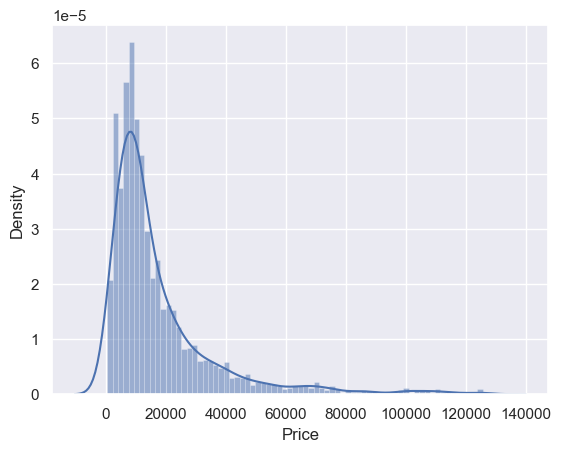

In [15]:
# Now by showing plot using new 'data1' our 'Price' plot is looking little bit more fine than before. 
# We know its not perfect but its acceptable for now.

showHistPlot(data1['Price'])

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


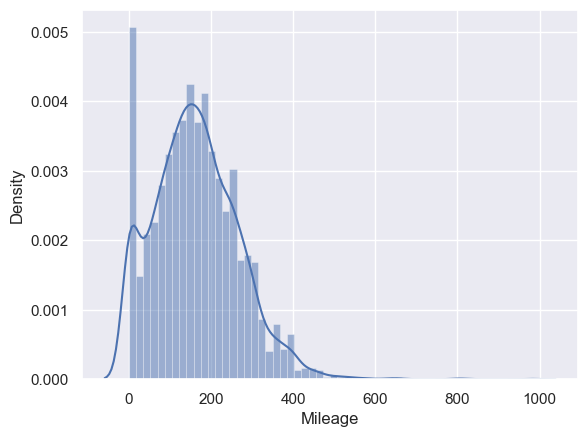

In [16]:
showHistPlot(cars_data_no_mv['Mileage'])

In [17]:
# The 99% of maximum value > OUTPUT > 435.5100000000002
q = data1['Mileage'].quantile(0.99)

# Only covering values below (99%)435.5100000000002
# This will also remove rows which are above (99%)435.5100000000002
# Creating new "data2" from "data1" dataframe
data2 = data1[data1['Mileage']<q]
describeAll(data2)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


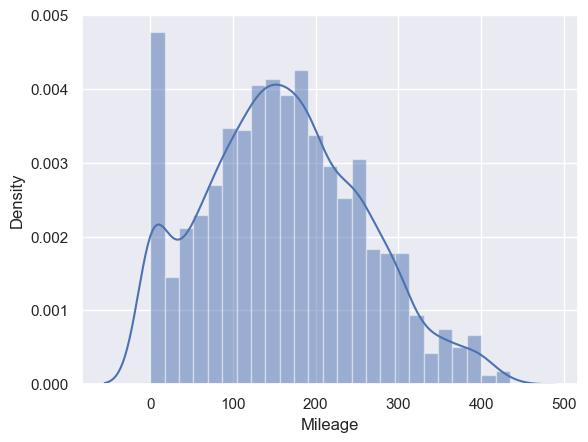

In [18]:
# Now by showing plot using new 'data2' our 'Mileage' plot is looking little bit more fine than before. 
# We know its not perfect but its acceptable for now.

showHistPlot(data2['Mileage'])

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


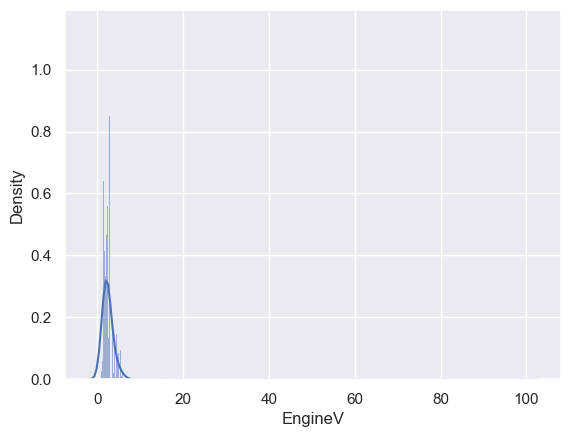

In [19]:
showHistPlot(cars_data_no_mv['EngineV'])

In [20]:
# When the Data of csv built the maximum engine volumn was 6.5 (not sure if its 10 now) \n
# We will only use values belows "6.5", As we already have a value/benchmark \n
# We dont need quantile. 

# Only covering values below (6.5)
# This will also remove rows which are above (6.5)
# Creating new "data3" from "data2" dataframe
data3 = data2[data2['EngineV'] < 6.5]
describeAll(data3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


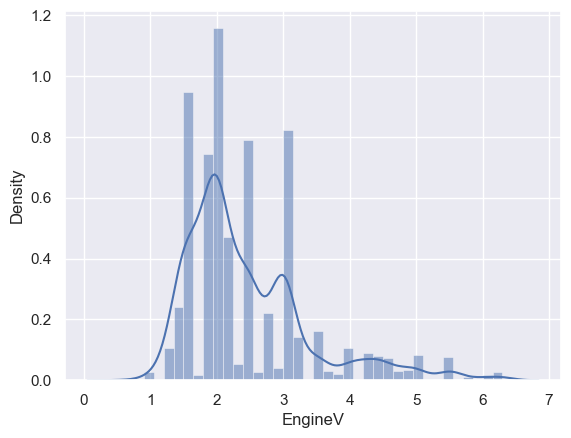

In [21]:
# Now by showing plot using new 'data3' our 'EngineV' plot is looking little bit more fine than before. 
# its looking better than before.

showHistPlot(data3['EngineV'])

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


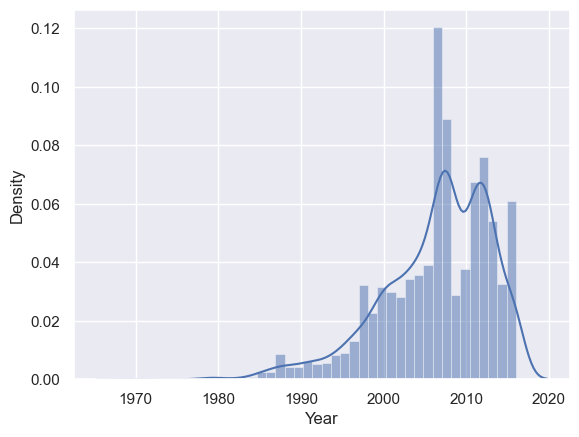

In [22]:
# Trying to check the 'Year' plot using 'data3' dataframe, if is good to use directly. \n
# Or it has outliars. 

showHistPlot(data3['Year'])

### As you can see the skew is going to left so it means outliars are low years between (1970-1985). Lets remove them. 

In [24]:
# The 99% of maximum value > OUTPUT > 1987.0
q = data3['Year'].quantile(0.01)

# Only covering values below (1%)1987.0
# This will also remove rows which are above (1%)1987.0
# Creating new "data2" from "data1" dataframe
data4 = data3[data3['Year']>q]
describeAll(data4)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


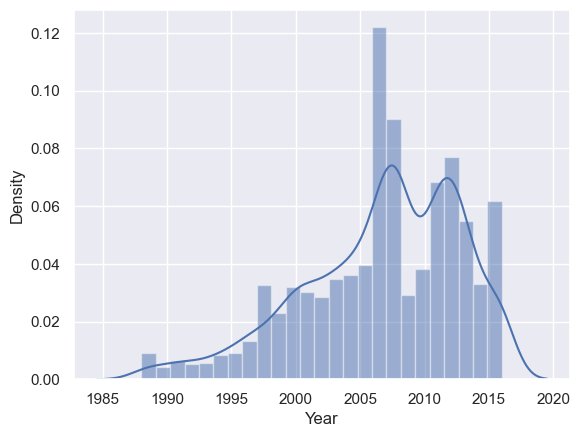

In [25]:
# Now by showing plot using new 'data4' our 'Year' plot is looking little bit more fine than before. 
# its looking better than before.

showHistPlot(data4['Year'])

### We need to reset the indexes because all the rows we have removed left the gaps in index of rows. for example indexes[1,2,3] > we removed 2nd row > indexes[1,3] so there is gap between 1 and 3.

## We need to fill the indexes by resetting them.

In [27]:
# drop=True means it will replace index completly
clean_data = data4.reset_index(drop=True)
clean_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


## We Deleted almost 250 observations/row.

## Data's Pre-processing done here. 

## Start regression assumption from below.

Text(0.5, 1.0, 'Price And Mileage')

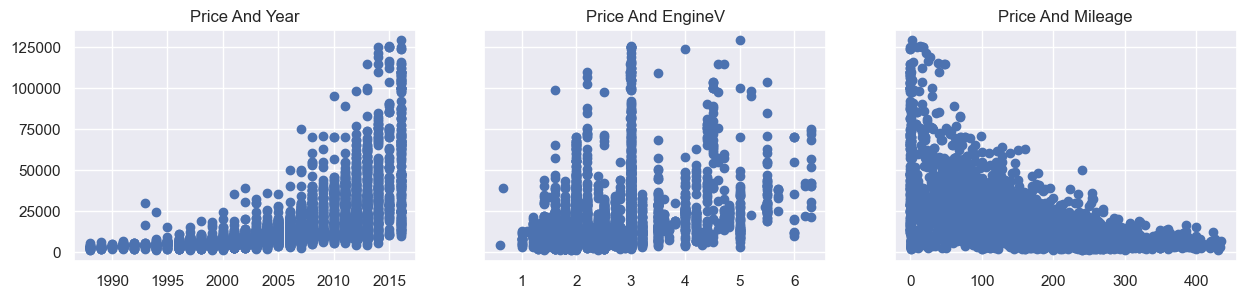

In [29]:
# OLS Assumption to check linearity of relation \n
# Between features and target

f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True, figsize = (15,3))
ax1.scatter(clean_data['Year'],clean_data['Price'])
ax1.set_title('Price And Year')
ax2.scatter(clean_data['EngineV'],clean_data['Price'])
ax2.set_title('Price And EngineV')
ax3.scatter(clean_data['Mileage'],clean_data['Price'])
ax3.set_title('Price And Mileage')

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


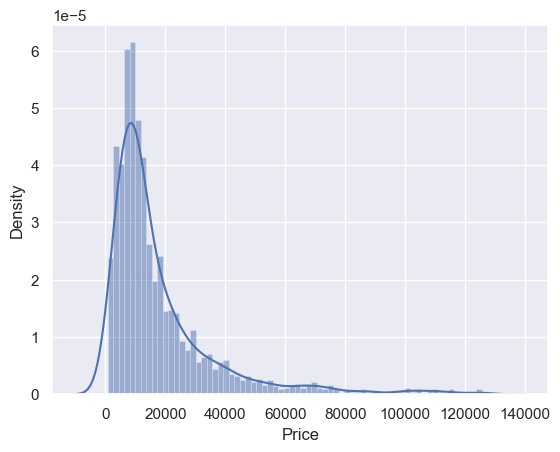

In [30]:
# Above plot are not in linear way
# It could be possible that relation with dependent variables \n
# is not symmetric 
# So we need to check if dependent variable (PRICE) \n
#  is "Normally Distributed" OR not

showHistPlot(clean_data['Price'])

## As you can see "Price" target variable is not "Normally Distributed" thats why other features relation with "Price" is not linear (as shown above in three plots.)

## For solution we can Log target/dependent (Price) values 

## NOTE: Right now "Price" is "Right skewed" so we are using "Log transformation" but in some other cases we could see "Left skewed" target values so we need to use "other transformation" like "Power transformation".

## Numpy has a log method (See the example below.)

In [32]:
# log_price = np.log(clean_data['Price'])
# clean_data['log_price'] = log_price
# clean_data.head()

### So now we have transformed Price variable using log method. 
## We can now try again feature and target relation using new log_price values

In [34]:
# showHistPlot(clean_data['log_price'])

In [35]:
# This time we will use "log_price" instead of "Price" variable

# f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True, figsize = (15,3))
# ax1.scatter(clean_data['Year'],clean_data['Price'])
# ax1.set_title('Log Price And Year')
# ax2.scatter(clean_data['EngineV'],clean_data['Price'])
# ax2.set_title('Log Price And EngineV')
# ax3.scatter(clean_data['Mileage'],clean_data['Price'])
# ax3.set_title('Log Price And Mileage')

### You can now see a linearity in relation between log_price and other target variables

### Now we dont need "Price" values so we can remove it.


In [37]:
# clean_data_without_price= clean_data.drop(['Price'],axis = 1)
# clean_data_without_price

## We are checking if is there any Multicollinearity between features

In [39]:
# Stats_model has methods to check \n 
# if there is any Multicollinearity between given \n
# features.

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Mileage','Year','EngineV']]

# Calculating variance inflation for each feature \n
# (right now we provided 3 features)
vif = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]

# Printing features and VIF in dataframe
pd.DataFrame({'Features':variables.columns, 'VIF': vif})

,Features,VIF
0,Mileage,3.791584
1,Year,10.354854
2,EngineV,7.662068


### The highest value to remove the could be 5/10 or even more. It totally depends on the variable. For that we need to check if it could be safely remove or not. or how much its impact on regression's performance.

In [41]:
# So 'Year' has the highest value of VIF so we will remove it \n
# Because it has the laragest "Multicollinearity" and it can mislead the model
# to generate inaccurate values.

data_without_multicollinearity = clean_data.drop(['Year'], axis = 1) 


In [42]:
data_without_multicollinearity

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration
0,BMW,4200.0,sedan,277,2.0,Petrol,yes
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes
3,Audi,23000.0,crossover,240,4.2,Petrol,yes
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes
...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes


### Now it time to create dummies for all categorical data
### Note we have checked regression analysis with numerical/continuous data
### Now only Categorical data is left so we need to make dummies for that to use them in model/regression 

### Pandas Library provides "get_dummies(DataFrame)" method to which creates dummies automatically for each category. 



In [44]:
# drop_first = True will remove first category dummy data to reduce multicollinearity between dummies 
data_dummies = pd.get_dummies(data_without_multicollinearity,drop_first = True)
data_dummies

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,7900.0,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,13300.0,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,23000.0,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,18300.0,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,11500.0,163,2.5,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,17900.0,35,1.6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,125000.0,9,3.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,6500.0,1,3.5,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [45]:
# data_dummies.columns.values

In [46]:
# colms = ['Price','Mileage', 'EngineV',  'Brand_BMW',
#        'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
#        'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
#        'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
#        'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
#        'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
#        'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
#        'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
#        'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
#        'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
#        'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
#        'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
#        'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
#        'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
#        'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
#        'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
#        'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
#        'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
#        'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
#        'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
#        'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
#        'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
#        'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
#        'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
#        'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
#        'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
#        'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
#        'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
#        'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
#        'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
#        'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
#        'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
#        'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
#        'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
#        'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
#        'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
#        'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
#        'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
#        'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
#        'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
#        'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
#        'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
#        'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
#        'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
#        'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
#        'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
#        'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
#        'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
#        'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
#        'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
#        'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
#        'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
#        'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
#        'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
#        'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
#        'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
#        'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
#        'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
#        'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
#        'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
#        'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
#        'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
#        'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
#        'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
#        'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
#        'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
#        'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
#        'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
#        'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
#        'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
#        'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
#        'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
#        'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
#        'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
#        'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
#        'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
#        'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
#        'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
#        'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
#        'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
#        'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
#        'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
#        'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
#        'Model_Yaris', 'Model_Z3', 'Model_Z4']

colms = ['Price','Mileage', 'EngineV','Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

data_pre_processed = data_dummies[colms]




In [47]:
data_pre_processed.head(2)

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,7900.0,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True


### Lets declare the inputs(to scale them) and targets 

### Scalling before splitting into train and test data is a good common practice in machine learning. It improves the overall performance of model

In [49]:
target = data_pre_processed['Price']
inputs = data_pre_processed.drop(['Price'],axis=1)

In [50]:
from sklearn.preprocessing import StandardScaler

#Fit the model over inputs(included dummies also)
scaler = StandardScaler().fit(inputs)

# Transform to make input standardized
input_scaled = scaler.transform(inputs)

#NOTE : We should not standardise the dummy values.
# Because after standardization  the dummy values will lose their actual meaning.

### Convert data to Train and Test data

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(input_scaled,target, test_size = 0.2 ,random_state = 365)

In [53]:
linearReg = LinearRegression()
linearReg.fit(x_train,y_train)

LinearRegression()

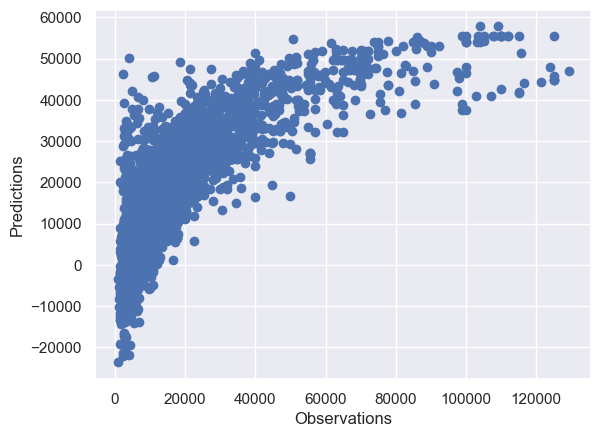

In [118]:
y_hat = linearReg.predict(x_train)


# the plot of predictions and targets 
# To check if predictions(output of model) and targets(actual observations) are closer?
# if Values are closer or matching then it means model is working good.
# If you see points are closer to the linear line then it means model is working good.
plt.scatter(y_train,y_hat)
plt.xlabel("Observations")
plt.ylabel("Predictions")

plt.show()

## Lets take residuals(error) or we can say (prediction - observations = error) to see how much difference are between them.

## Lets plot it to better understanding. The error/residuals values must be normalized


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Residuals PDF')

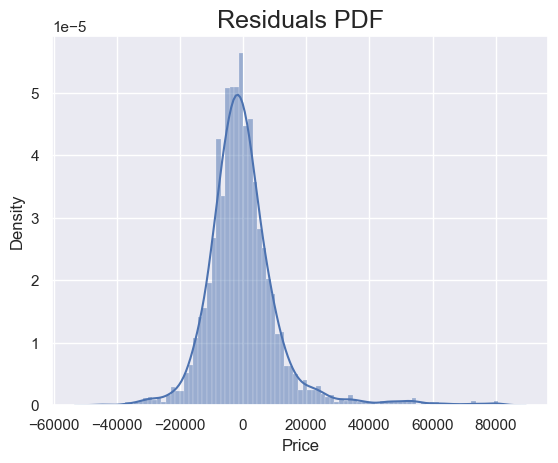

In [56]:
showHistPlot(y_train-y_hat)
plt.title("Residuals PDF", fontsize = 18)

## As you can see in above histplot, The left side is long or left tell is long. Thats mean (y_train(observation) - y_hat(predictions)) are less than mean.
 
## Thats also mean the predictions are overestimated the target (predictions are higher than the actual observations). Or we can say our predictions go further than actual values. which is unwated extra value which we dont need. 

# NOTE: If our histplot of error would be in center and with same tells on each sides. then we can say its more better in predict the observation values.

In [58]:
# Lets calculate R-squared to check how much our model is explaining the variability.

# how features(x_train) is explaining the observations(y_train) changes
linearReg.score(x_train,y_train)

0.5921152393004872

## As you can see our model is explaining 83% of the variability.

In [60]:
# Lets find the weights(coef) and bias(intercept)

weights = linearReg.coef_
bias = linearReg.intercept_

pd.DataFrame({"Columns": inputs.columns.values, "Weights": weights})

,Columns,Weights
0,Mileage,-9846.157067
1,EngineV,4370.826146
2,Brand_BMW,456.732177
3,Brand_Mercedes-Benz,936.131299
4,Brand_Mitsubishi,-3048.692103
5,Brand_Renault,-3297.913326
6,Brand_Toyota,-1972.573986
7,Brand_Volkswagen,-2201.587465
8,Body_hatch,-2684.828863
9,Body_other,-2692.934086


<h1> <u>According to above table Weight interpretation:</u></h1>
<h1> <u>Continues values:</u></h1>

## Nagetive Weight Value: 
### where weight/coeficient value is in minus(Nagetive) it means oposite relation between feature and observation (increase in feature will decrease in observation value)

## Positive Weight Value: 
### If weight/coeficient value is in plus(Positive) it means symmetric relation between feature and observation (increase in feature will also increase in observation value)

<h1> <u>Categorical values(dummies):</u></h1>

## BenchMark : the dummy variable we dropped (for example in brand section we dropped "Audi" (to prevent the multicollinearity)) is the benchmark.

## Nagetive Weight Value: 
### where weight/coeficient value is in minus(Nagetive) it means this category's price(dependent) value is lower than "Benchmark" category's price(dependent) value. (this brand cheaper than benchmark brand)

## Positive Weight Value: 
### If weight/coeficient value is in plus(Positive) it means this category's price(dependent) value is higher than "Benchmark" category's price(dependent) value. (this brand expensive than benchmark brand)

In [62]:
# clean_data_without_price['Brand'].unique()

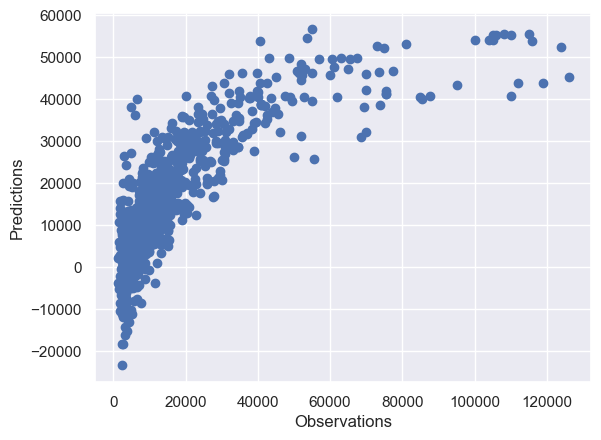

In [120]:
# Now lets use our test data (we have used trained data to train our model Using fit method)

y_hat_test = linearReg.predict(x_test)

# the plot of predictions and targets 
# To check if predictions(output of model) and targets(actual observations) are closer?
# if Values are closer or matching then it means model is working good.
# If you see points are closer to the linear line then it means model is working good.
plt.scatter(y_test,y_hat_test)
plt.xlabel("Observations")
plt.ylabel("Predictions")
# plt.xlim(6,13)
# plt.ylim(6,13)
plt.show()

In [64]:
# DateFrame's peformance
df_pf = pd.DataFrame({'Predictions': np.round(y_hat_test,2),'Target' :np.round(y_test,2) })
df_pf.reset_index(drop=True)

,Predictions,Target
0,15749.28,2300.0
1,3353.60,2800.0
2,8076.22,2500.0
3,5838.85,6400.0
4,17148.12,9150.0
...,...,...
769,37841.49,29500.0
770,12935.44,9600.0
771,19257.15,18300.0
772,30926.27,68500.0


In [65]:
df_pf['Residuals'] = df_pf['Target'] - df_pf['Predictions']
df_pf

,Predictions,Target,Residuals
1192,15749.28,2300.0,-13449.28
3360,3353.60,2800.0,-553.60
2350,8076.22,2500.0,-5576.22
3257,5838.85,6400.0,561.15
892,17148.12,9150.0,-7998.12
...,...,...,...
1935,37841.49,29500.0,-8341.49
3757,12935.44,9600.0,-3335.44
3134,19257.15,18300.0,-957.15
1369,30926.27,68500.0,37573.73


In [66]:
df_pf['Difference(%)'] = np.absolute((df_pf['Residuals']/df_pf['Target'])*100)
df_pf

,Predictions,Target,Residuals,Difference(%)
1192,15749.28,2300.0,-13449.28,584.751304
3360,3353.60,2800.0,-553.60,19.771429
2350,8076.22,2500.0,-5576.22,223.048800
3257,5838.85,6400.0,561.15,8.767969
892,17148.12,9150.0,-7998.12,87.411148
...,...,...,...,...
1935,37841.49,29500.0,-8341.49,28.276237
3757,12935.44,9600.0,-3335.44,34.744167
3134,19257.15,18300.0,-957.15,5.230328
1369,30926.27,68500.0,37573.73,54.852161


In [67]:
# By default only few rows are showing, 
# pd.options.display.max_rows = (the number of rows you want to see max) 
# pd.options.display.max_rows = 1500

# To change float values appearance
pd.set_option('display.float_format', lambda x: '%.2f'%x) 

# Sort dataframe values by column
df_pf.sort_values(by=['Difference(%)'])

,Predictions,Target,Residuals,Difference(%)
592,14900.51,14900.00,-0.51,0.00
3116,18989.89,18900.00,-89.89,0.48
241,34733.28,34900.00,166.72,0.48
965,12062.70,12000.00,-62.70,0.52
3219,6549.96,6500.00,-49.96,0.77
...,...,...,...,...
3617,15738.36,1800.00,-13938.36,774.35
2074,-18356.93,2700.00,21056.93,779.89
1952,26456.91,3000.00,-23456.91,781.90
1271,-18328.63,2400.00,20728.63,863.69
